In [45]:
import os
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# Get the current working directory
current_dir = Path(os.getcwd())

# Define the paths relative to the current working directory
PATH_TO_DATA_DIR = current_dir.parent / "Data"
PATH_TO_SEGMENTATION_DF = PATH_TO_DATA_DIR / "segmentation_df.feather"
PATH_TO_CLEANED_DICOM_DF = PATH_TO_DATA_DIR / "cleaned_dicom_df.feather"

In [46]:
segmentation_df = pd.read_feather(PATH_TO_SEGMENTATION_DF)
segmentation_df

,spleen,kidney_right,kidney_left,gallbladder,liver,stomach,pancreas,adrenal_gland_right,adrenal_gland_left,lung_upper_lobe_left,...,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages,SliceDirectory
0,33528,46248,44507,9220,333682,55542,19646,862,840,337393,...,9386,9896,7920,6262,5874,5186,2200,23617,54896,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
1,167282,86743,103410,15345,817358,86678,57476,1930,1990,765492,...,14696,14620,11393,10634,8682,6066,1400,43832,104785,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
2,56574,27618,39148,3902,258086,50416,15098,456,1008,193596,...,5254,5298,5362,5178,3814,2208,588,14832,32686,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
4,83200,74936,65155,17167,677116,70465,35868,2400,1940,453004,...,6508,8716,5848,9676,8134,5279,2495,29680,77373,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,55396,54734,57828,984,444832,217048,27819,1400,1550,556888,...,13376,11240,10440,8480,7235,4279,1890,32972,72968,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
679,43650,35218,61922,8004,572914,96306,30674,1574,1768,414640,...,11132,12338,9692,8220,6468,5268,2772,30782,75568,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
680,83480,53437,64621,5084,439693,95545,35191,800,1685,444120,...,9320,9600,8638,6814,5238,4898,2005,30812,60205,C:\Users\schoe\OneDrive - Fachhochschule Salzb...
681,78579,44734,39550,2018,651892,164890,29268,1359,1224,358860,...,8920,12275,9450,8260,7174,5442,2424,31640,60742,C:\Users\schoe\OneDrive - Fachhochschule Salzb...


In [47]:
cleaned_dicom_df = pd.read_feather(PATH_TO_CLEANED_DICOM_DF)

# Join the cleaned_dicom_df with the segmentation_df on the column 'SliceDirectory'
merged_df = pd.merge(cleaned_dicom_df, segmentation_df, on='SliceDirectory')
merged_df

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,...,rib_right_5,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages
0,ANONYM-XT8UJZ,64,M,80.0,1.81,Ganzkörper,512,512,487,"[0.9765625, 0.9765625]",...,6187,9386,9896,7920,6262,5874,5186,2200,23617,54896
1,ANONYM-XT8UJZ_1,56,M,73.0,1.71,Stamm,512,512,567,"[1.171875, 1.171875]",...,14960,14696,14620,11393,10634,8682,6066,1400,43832,104785
2,ANONYM-XT8UJZ_2,19,F,43.0,1.63,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",...,4996,5254,5298,5362,5178,3814,2208,588,14832,32686
3,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Hirn,512,512,119,"[1.171875, 1.171875]",...,0,0,0,0,0,0,0,0,0,0
4,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Stamm,512,512,567,"[1.171875, 1.171875]",...,9600,6508,8716,5848,9676,8134,5279,2495,29680,77373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,ANONYM-BI33HV_438,68,M,50.0,1.65,Stamm,512,512,623,"[1.171875, 1.171875]",...,10972,13376,11240,10440,8480,7235,4279,1890,32972,72968
679,ANONYM-BI33HV_439,75,M,68.0,1.80,Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",...,10310,11132,12338,9692,8220,6468,5268,2772,30782,75568
680,ANONYM-BI33HV_440,76,F,64.0,1.58,Stamm,512,512,511,"[1.171875, 1.171875]",...,9816,9320,9600,8638,6814,5238,4898,2005,30812,60205
681,ANONYM-BI33HV_441,80,M,69.0,1.78,Stamm,512,512,293,"[0.9765625, 0.9765625]",...,8444,8920,12275,9450,8260,7174,5442,2424,31640,60742


In [55]:
# Filter df my BodyPart == "Stamm"
filtered_df = merged_df[ merged_df["BodyPart"] == "Stamm"]
filtered_df

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,...,rib_right_5,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages
1,ANONYM-XT8UJZ_1,56,M,73.0,1.71,Stamm,512,512,567,"[1.171875, 1.171875]",...,14960,14696,14620,11393,10634,8682,6066,1400,43832,104785
4,ANONYM-XT8UJZ_3,77,F,74.0,1.63,Stamm,512,512,567,"[1.171875, 1.171875]",...,9600,6508,8716,5848,9676,8134,5279,2495,29680,77373
5,ANONYM-XT8UJZ_4,46,F,73.0,1.74,Stamm,512,512,293,"[0.9765625, 0.9765625]",...,6476,7070,7200,6450,5488,4240,3226,1764,21940,46962
6,ANONYM-XT8UJZ_5,76,F,77.0,1.63,Stamm,512,512,568,"[1.171875, 1.171875]",...,6472,8586,8965,7850,6175,4520,3200,2516,30168,66104
7,ANONYM-XT8UJZ_6,68,M,64.0,1.79,Stamm,512,512,263,"[0.9765625, 0.9765625]",...,7380,7760,8816,7496,6404,4744,3382,1608,25346,52102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,ANONYM-BI33HV_435,67,F,52.0,1.70,Stamm,512,512,263,"[0.9765625, 0.9765625]",...,6730,7248,7384,5864,4880,4462,2524,360,21216,49566
678,ANONYM-BI33HV_438,68,M,50.0,1.65,Stamm,512,512,623,"[1.171875, 1.171875]",...,10972,13376,11240,10440,8480,7235,4279,1890,32972,72968
680,ANONYM-BI33HV_440,76,F,64.0,1.58,Stamm,512,512,511,"[1.171875, 1.171875]",...,9816,9320,9600,8638,6814,5238,4898,2005,30812,60205
681,ANONYM-BI33HV_441,80,M,69.0,1.78,Stamm,512,512,293,"[0.9765625, 0.9765625]",...,8444,8920,12275,9450,8260,7174,5442,2424,31640,60742


In [59]:
zero_value_per_column = np.zeros(segmentation_df.shape[1])
for i in range(segmentation_df.shape[1]):
    zero_value_per_column[i] = np.count_nonzero(segmentation_df.iloc[:, i] == 0)

zero_value_df = pd.DataFrame([zero_value_per_column], columns=segmentation_df.columns)

zero_value_df.iloc[0].sort_values(ascending=False)[:20]

kidney_cyst_right               682.0
kidney_cyst_left                677.0
prostate                        284.0
gallbladder                     121.0
brain                            74.0
portal_vein_and_splenic_vein     59.0
rib_left_10                      48.0
urinary_bladder                  47.0
gluteus_maximus_right            47.0
gluteus_minimus_right            47.0
vertebrae_L2                     47.0
vertebrae_L3                     47.0
vertebrae_L4                     47.0
vertebrae_L5                     47.0
vertebrae_S1                     47.0
gluteus_minimus_left             47.0
iliac_artery_right               47.0
iliac_vena_right                 47.0
iliac_vena_left                  47.0
iliac_artery_left                47.0
Name: 0, dtype: float64

In [60]:
# find all rows where vertebrae_L2 is 0
vertebrae_L2_0 = filtered_df[filtered_df["vertebrae_L2"] == 0]
vertebrae_L2_0

,PatientId,PatientAge,PatientSex,PatientWeight,PatientSize,BodyPart,Rows,Columns,SliceCount,PixelSpacing,...,rib_right_5,rib_right_6,rib_right_7,rib_right_8,rib_right_9,rib_right_10,rib_right_11,rib_right_12,sternum,costal_cartilages
20,ANONYM-XT8UJZ_19,62,M,58.0,1.72,Stamm,512,512,511,"[1.171875, 1.171875]",...,4028,620,1940,600,100,0,0,0,0,35245
63,ANONYM-XT8UJZ_59,76,M,80.0,1.86,Stamm,512,512,110,"[0.5859375, 0.5859375]",...,0,0,0,0,0,0,0,0,0,0
473,ANONYM-BI33HV_239,71,M,76.0,1.72,Stamm,512,512,115,"[0.9765625, 0.9765625]",...,6838,7842,7516,5872,4778,1546,469,0,25474,28637
474,ANONYM-BI33HV_240,72,M,70.0,1.72,Stamm,512,512,287,"[1.171875, 1.171875]",...,11560,12408,13175,9510,7485,4705,1165,0,35825,69954
475,ANONYM-BI33HV_241,68,F,61.0,1.54,Stamm,512,512,115,"[0.9765625, 0.9765625]",...,3986,4484,5354,3680,3890,3106,1440,133,23526,25579


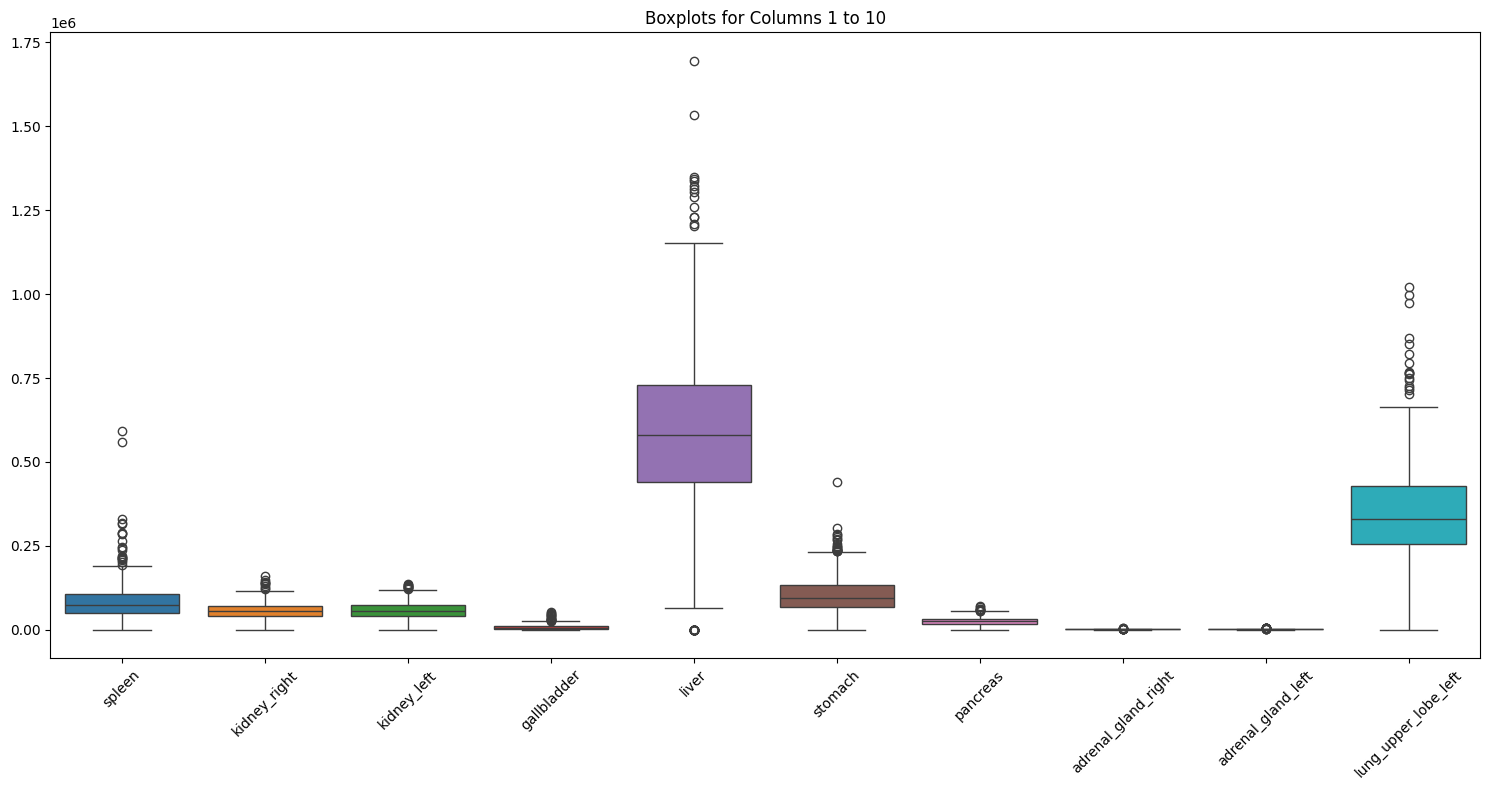

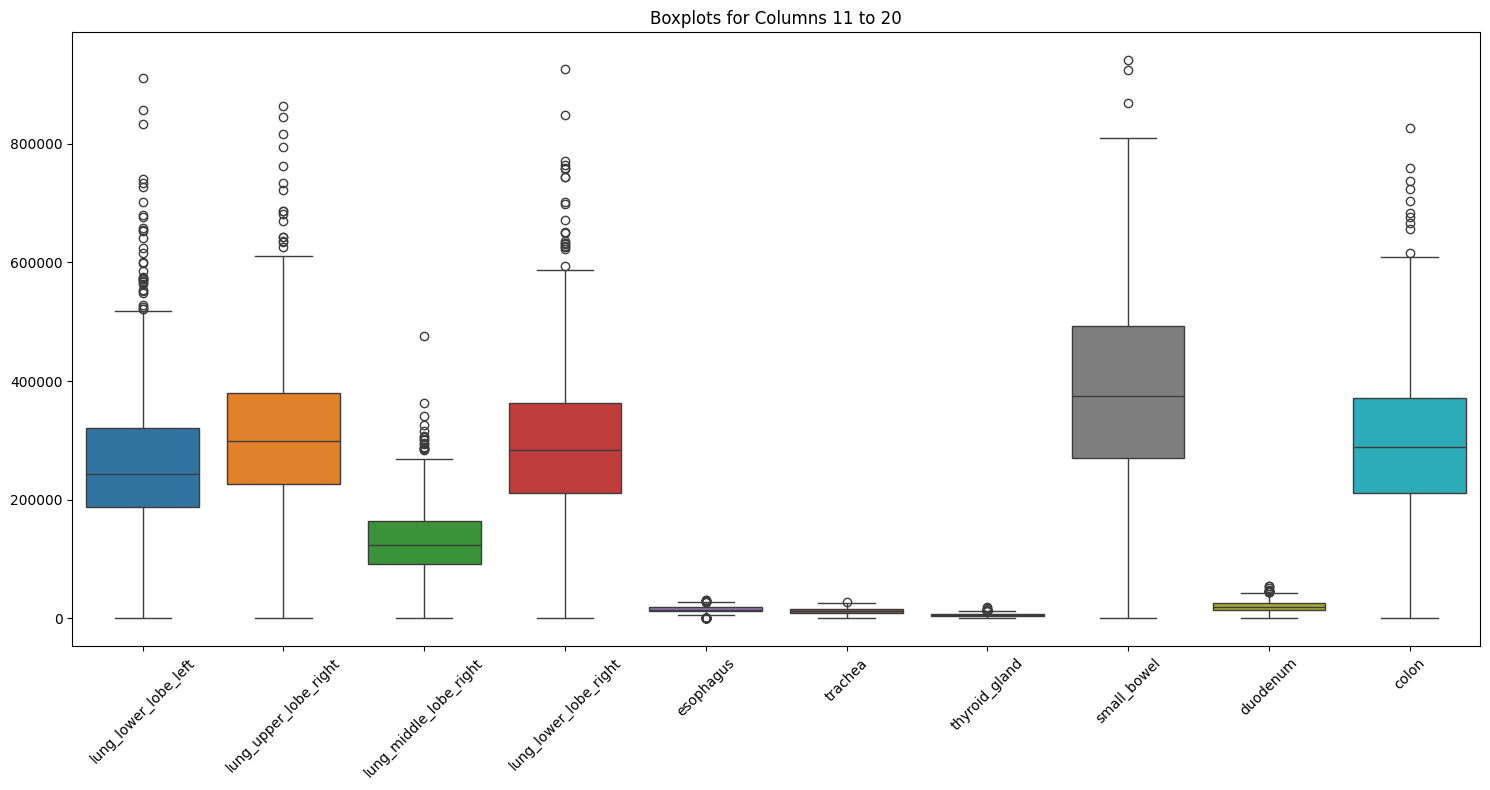

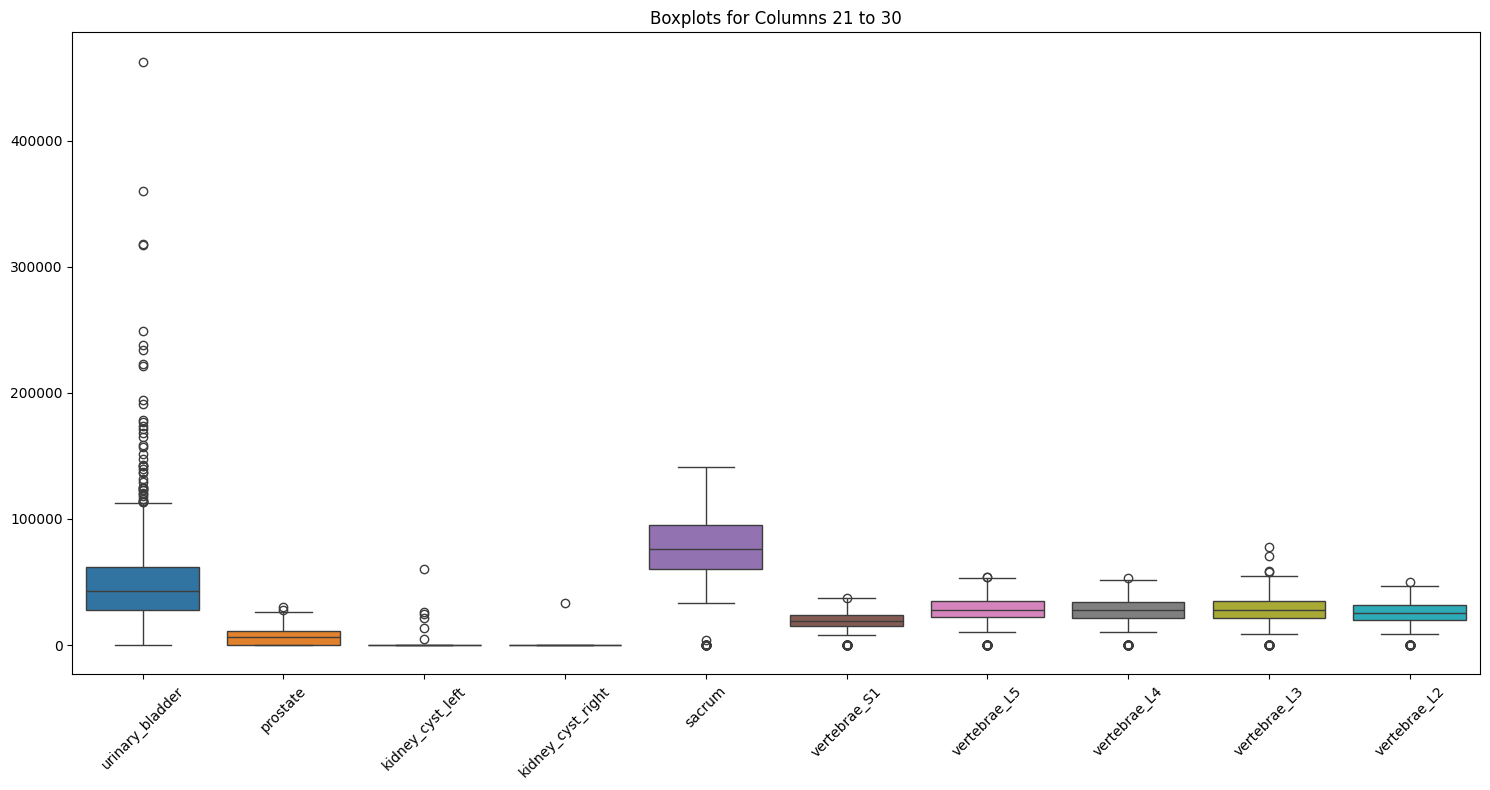

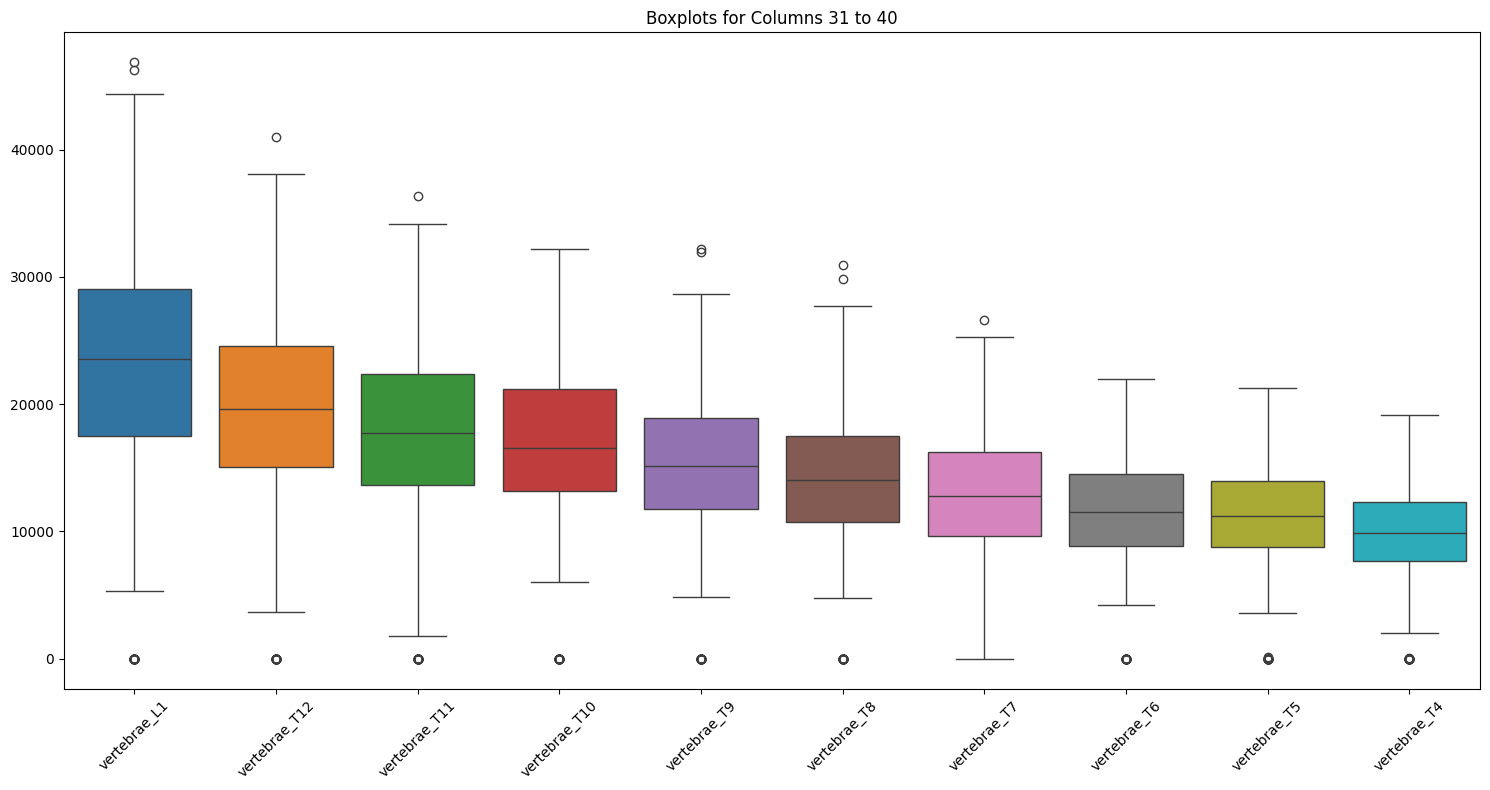

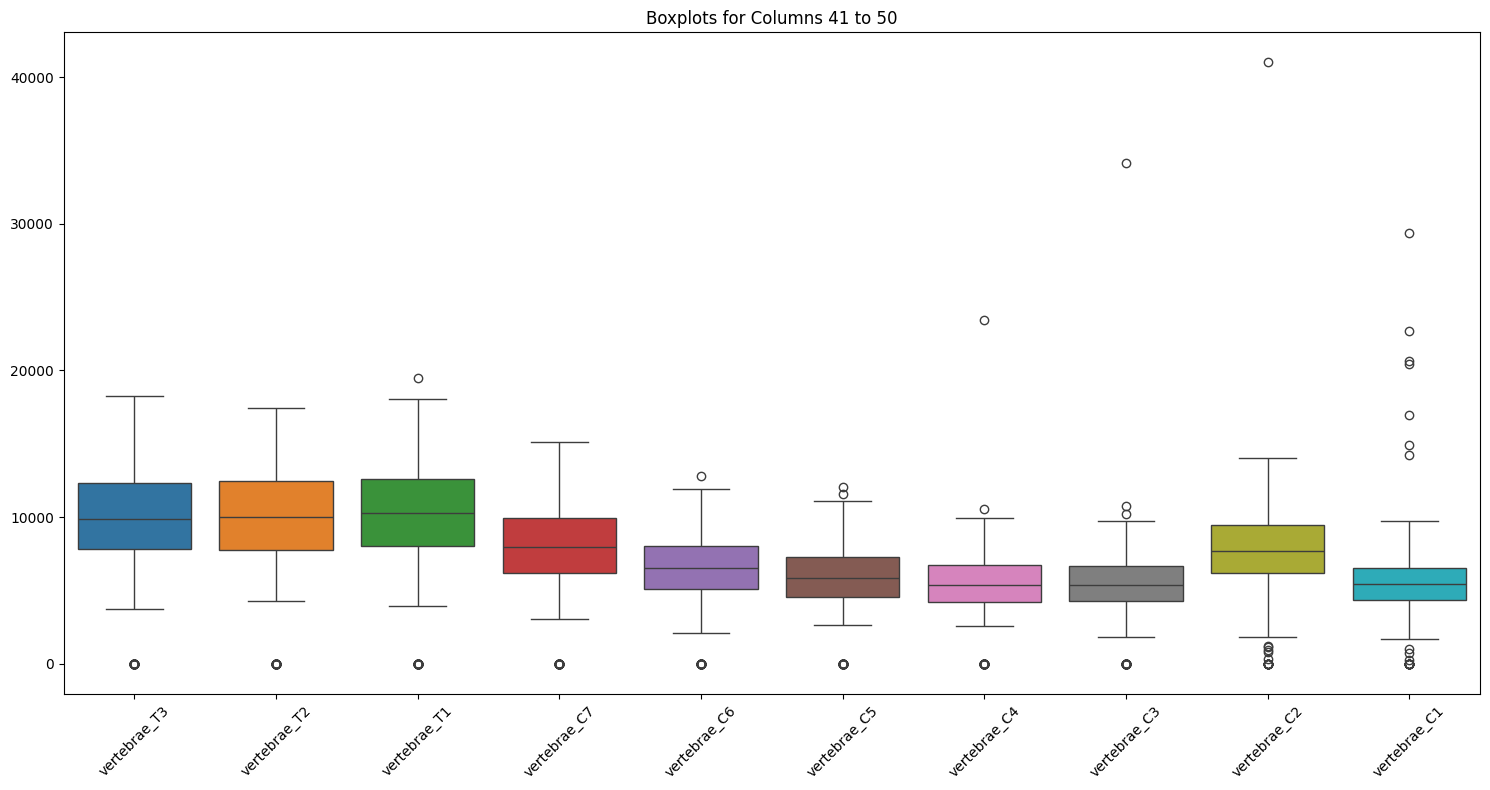

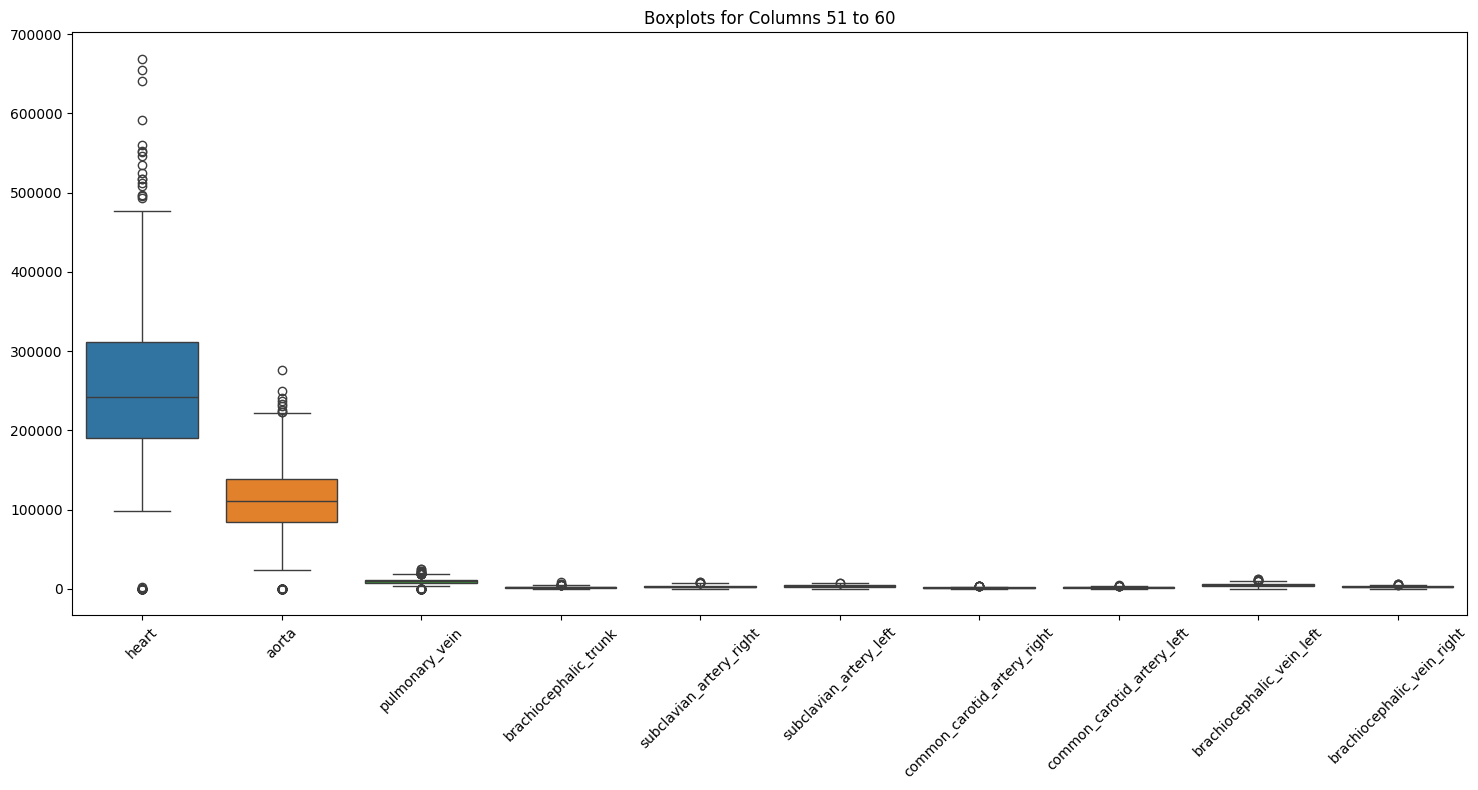

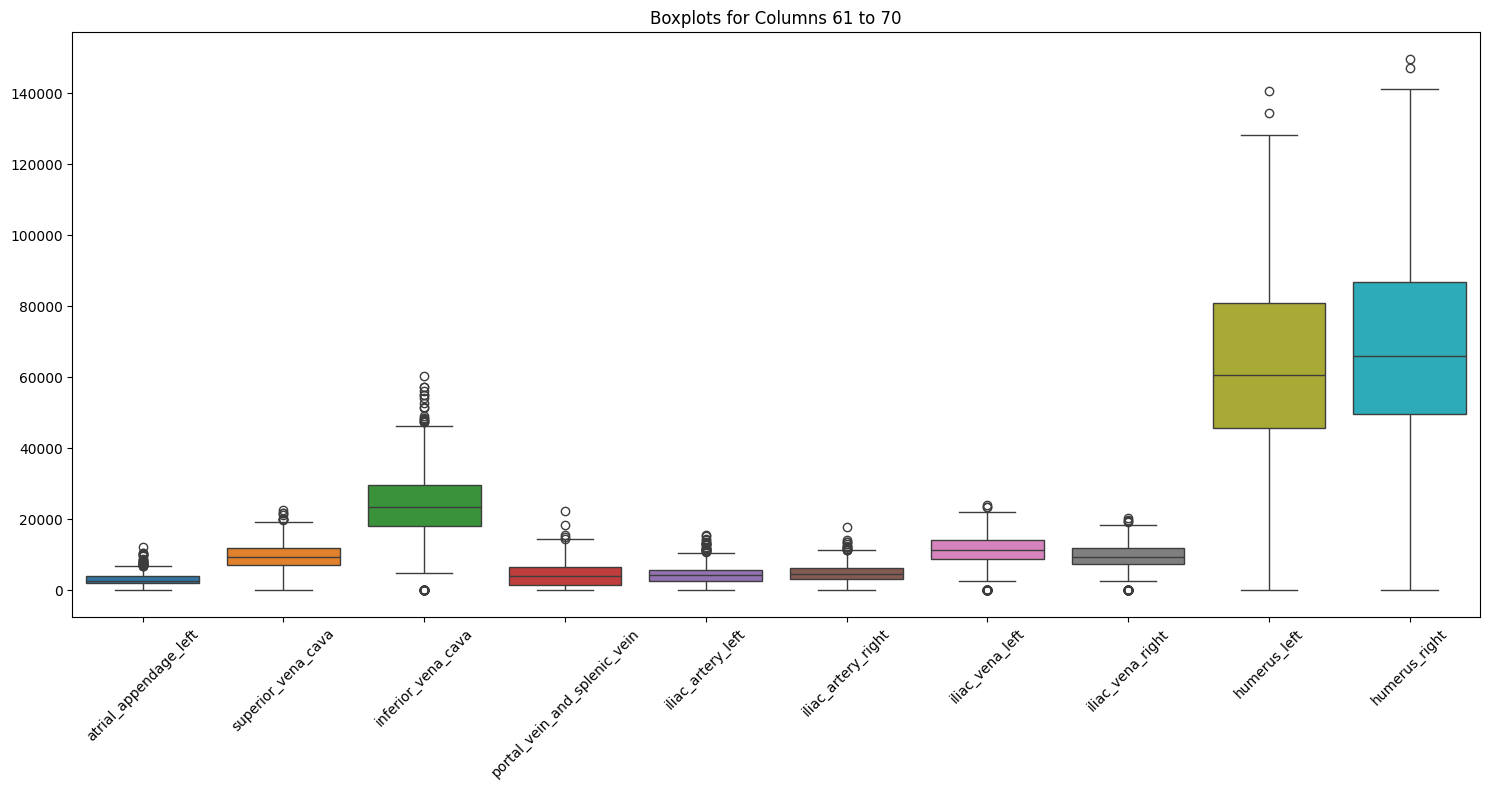

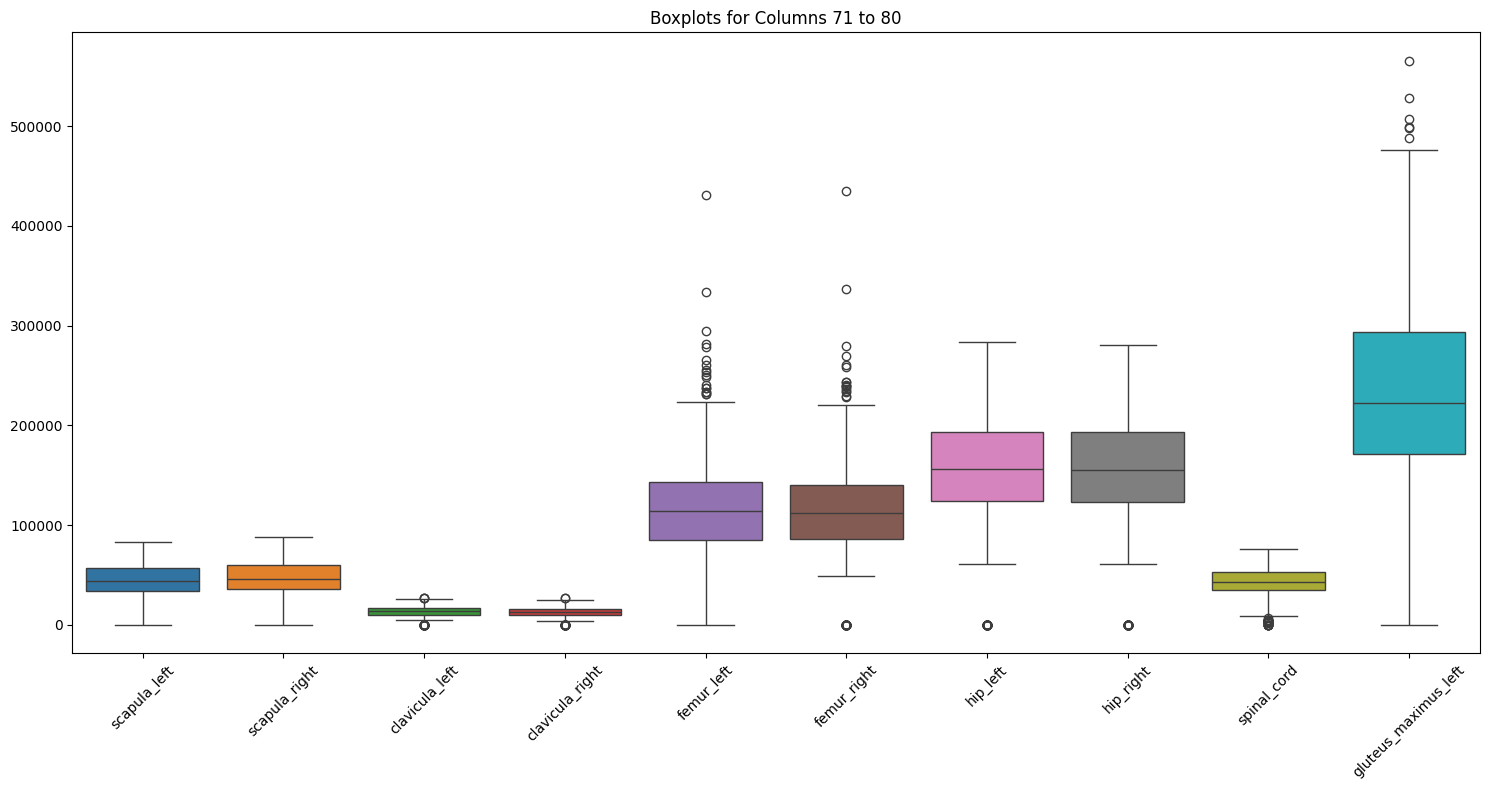

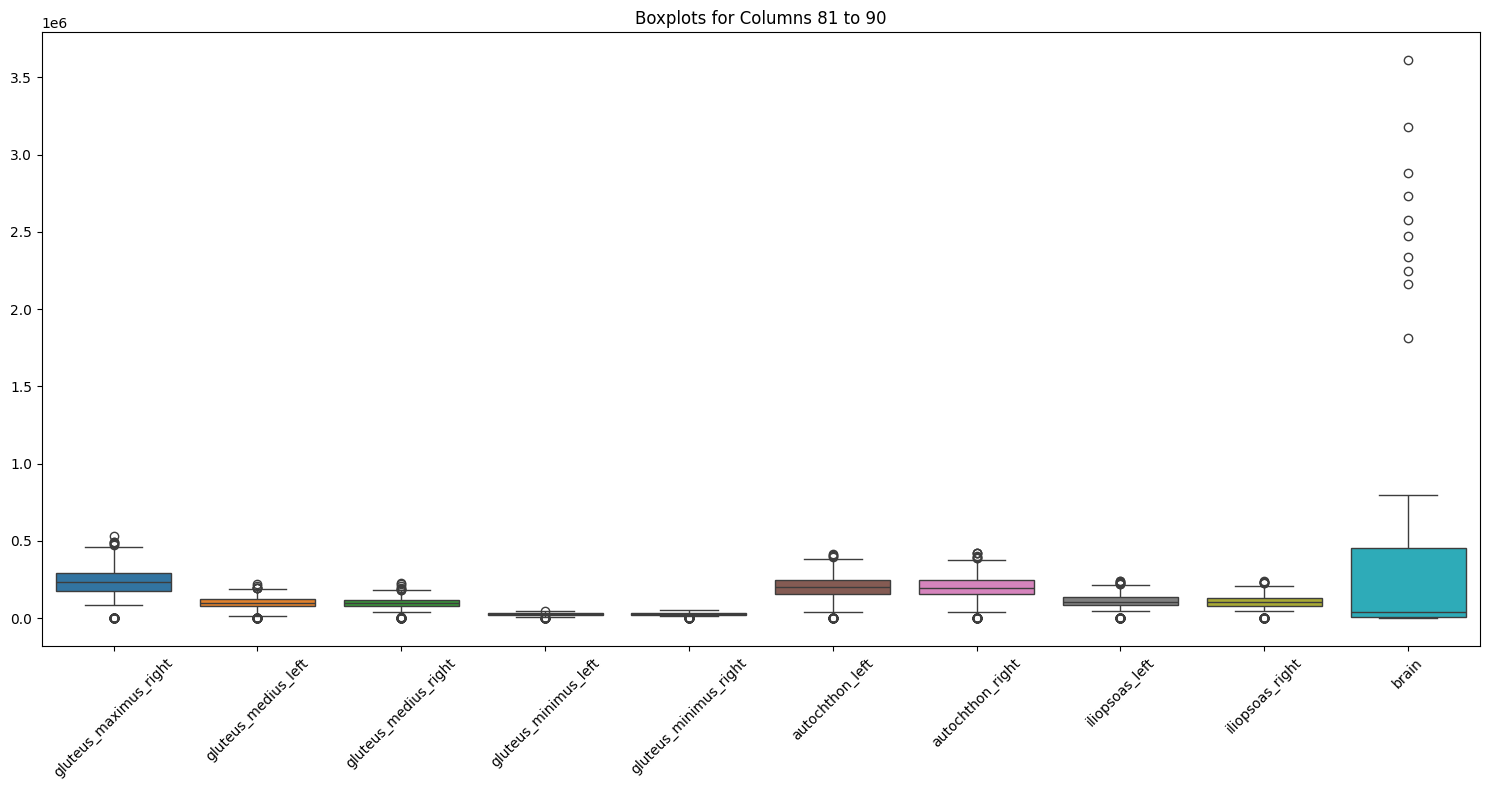

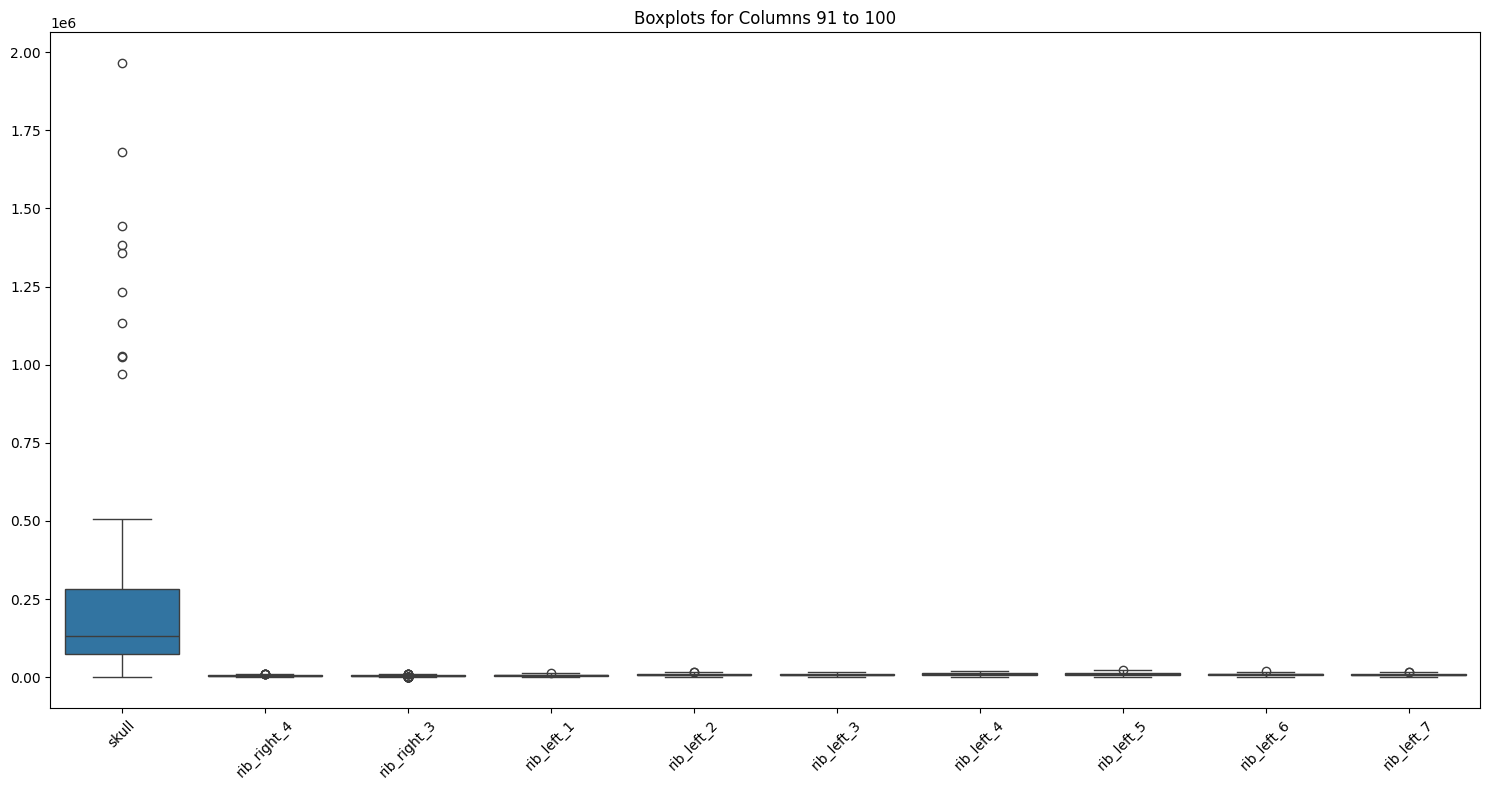

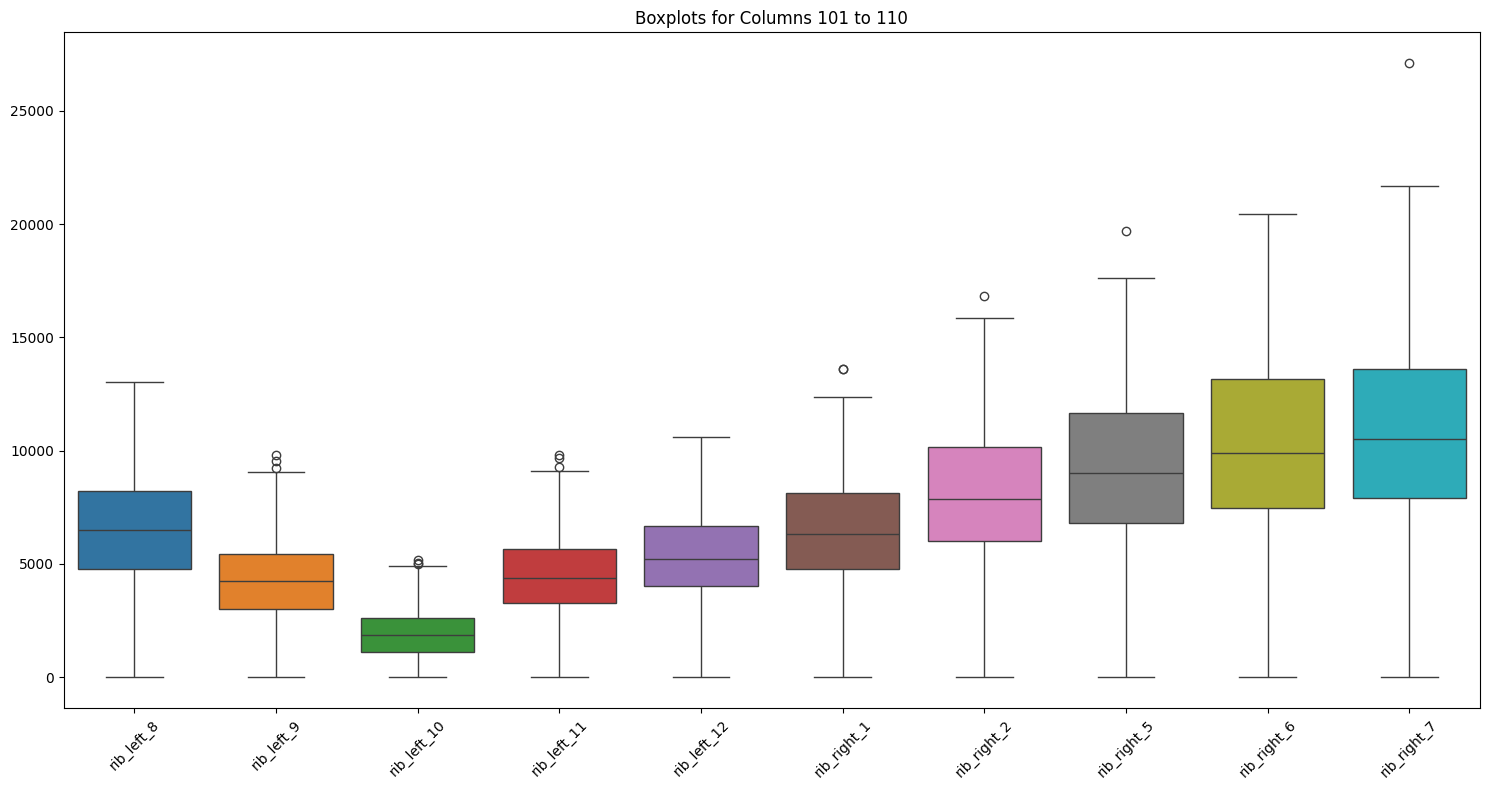

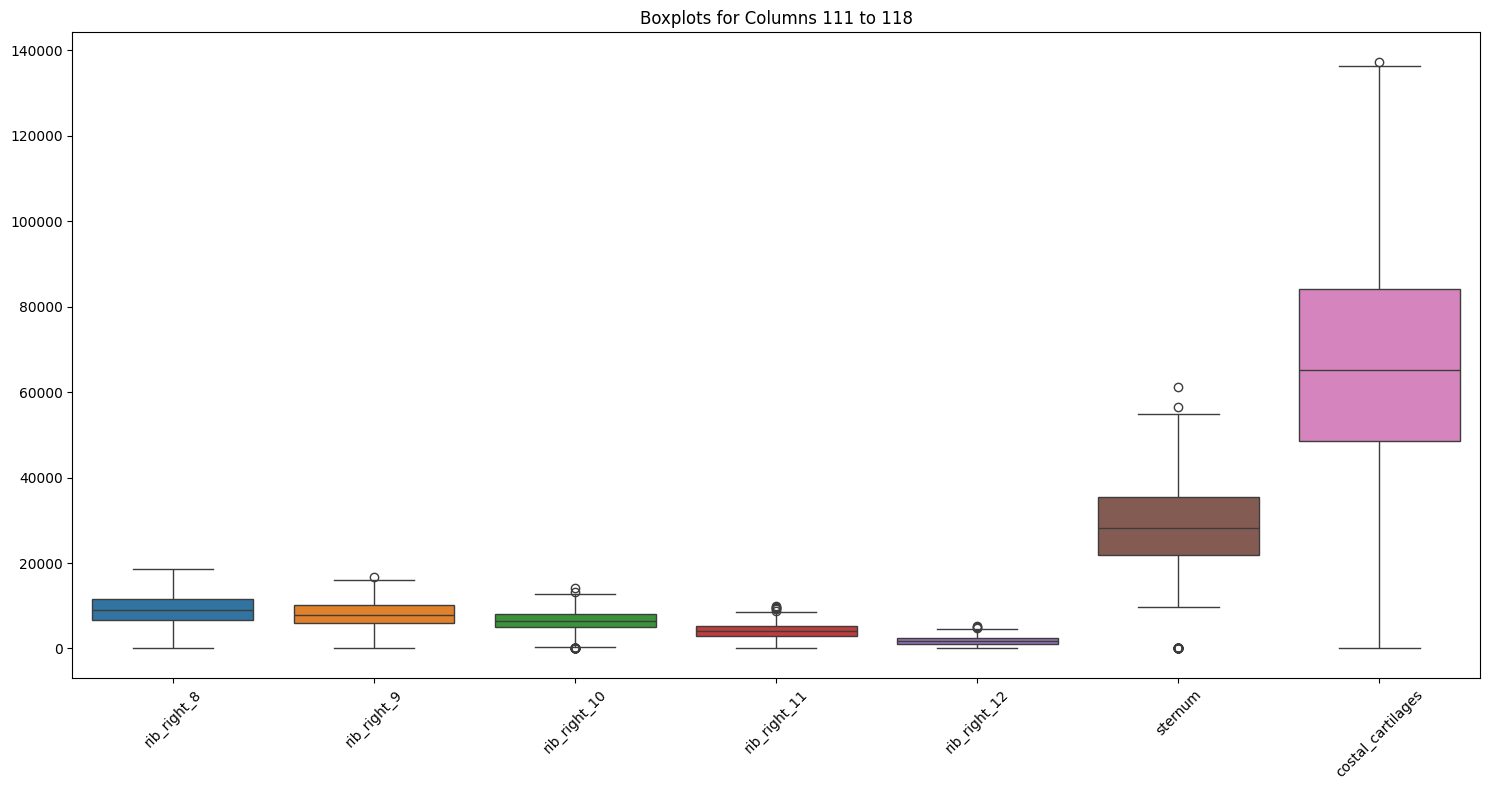

In [63]:
num_columns = 118
cols_per_plot=10

num_cols = len(segmentation_df.columns)
for i in range(0, num_cols, cols_per_plot):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=segmentation_df.iloc[:, i:i + cols_per_plot])
    plt.title(f'Boxplots for Columns {i + 1} to {min(i + cols_per_plot, num_cols)}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()